In [1]:
%pylab inline
import pandas as pd
from sklearn import model_selection, preprocessing, metrics, svm

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                   sep=";")

In [3]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [4]:
y_class = np.where(y<6, 0, 1)

In [5]:
scaler = preprocessing.StandardScaler()

In [6]:
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [7]:
X_std.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,7.584333e-17,5.196832e-16,6.019639e-16,-1.024542e-16,6.482723e-17,-4.671641e-17,1.057636e-16,3.212112e-14,-1.203860e-15,-7.572999e-16,-2.178784e-15
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.620351e+00,-1.966985e+00,-2.761743e+00,-1.141944e+00,-1.683274e+00,-1.958677e+00,-3.044230e+00,-2.313038e+00,-3.101408e+00,-2.364709e+00,-2.043297e+00
25%,-6.575011e-01,-6.771010e-01,-5.304757e-01,-9.250474e-01,-4.473347e-01,-7.237750e-01,-7.144739e-01,-7.707066e-01,-6.508363e-01,-6.997104e-01,-8.242757e-01
50%,-6.493106e-02,-1.809917e-01,-1.172780e-01,-2.349217e-01,-1.269060e-01,-7.692173e-02,-1.026189e-01,-9.609320e-02,-5.475133e-02,-1.739212e-01,-9.286267e-02
75%,5.276390e-01,4.143393e-01,4.611988e-01,6.918185e-01,1.935226e-01,6.287364e-01,6.739664e-01,6.930457e-01,6.075653e-01,5.271310e-01,7.198184e-01
max,8.705106e+00,8.153643e+00,1.095642e+01,1.171411e+01,1.374308e+01,1.491831e+01,7.098444e+00,1.503130e+01,4.184075e+00,5.171602e+00,2.995326e+00


In [8]:
X_train_std, X_test_std, y_train, y_test = model_selection.train_test_split(X_std, y_class, test_size=0.3)

In [9]:
clf = svm.SVC(gamma=0.01)
clf.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
fpr, tpr, thr = metrics.roc_curve(y_test, clf.decision_function(X_test_std))

In [11]:
auc = metrics.auc(fpr, tpr)

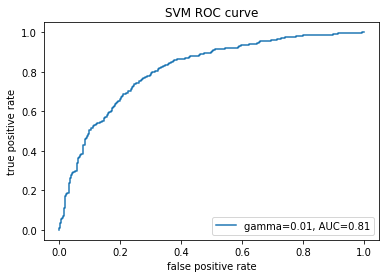

In [12]:
plt.plot(fpr, tpr, label='gamma=0.01, AUC=%.2f' % auc)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("SVM ROC curve")
plt.legend(loc="lower right")

In [13]:
C_range = np.logspace(-3,3,7)
gamma_range = np.logspace(-2,2,5)
param_grid={"C":C_range,"gamma":gamma_range}
score="roc_auc"
grid = model_selection.GridSearchCV(svm.SVC(),param_grid,scoring=score, cv=5, n_jobs=-1)

In [14]:
grid.fit(X_train_std,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [15]:
print("The optimal parameters are %s with a roc auc of %.2f" % (grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 1.0, 'gamma': 1.0} with a roc auc of 0.85


In [16]:
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, grid.decision_function(X_test_std))
auc_cv = metrics.auc(fpr,tpr)

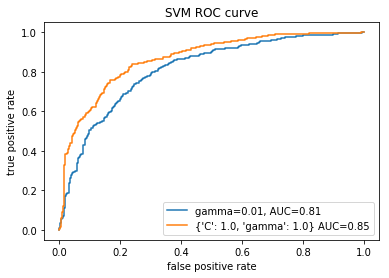

In [17]:
plt.plot(fpr, tpr, label='gamma=0.01, AUC=%.2f' % auc)
plt.plot(fpr_cv, tpr_cv, label="%s AUC=%.2f" % (grid.best_params_, grid.best_score_))
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("SVM ROC curve")
plt.legend(loc="lower right")

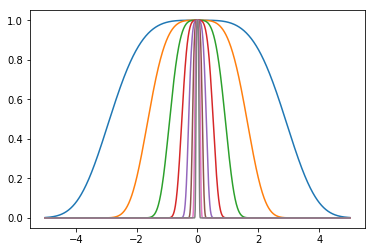

In [45]:
for gamma in np.logspace(-2,5,8):
    plt.plot(np.linspace(-5,5,1000), [np.exp(-gamma*x**4) for x in np.linspace(-5,5,1000)])

In [36]:
kmatrix = lambda gamma : metrics.pairwise.rbf_kernel(X_train_std, gamma=gamma)

In [37]:
kmatrix100=kmatrix(0.01)[:100,:100]

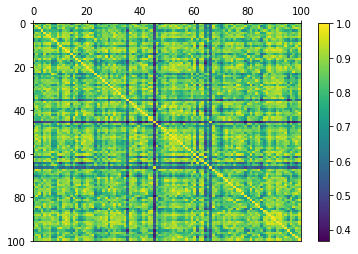

In [38]:
plt.pcolor(kmatrix100)
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

In [43]:
kmatrix100=kmatrix(0.1)[:100,:100]

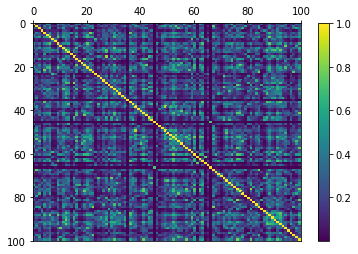

In [44]:
plt.pcolor(kmatrix100)
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

Contrairement à sa version linéaire, la version à noyau de la régression ridge ne nous donne pas une forme explicite de la fonction de décision f en fonction des variables. C'est ce qu'on appelle une approche non-paramétrique (eh oui, malgré les paramètres du noyau), comme pour la SVM à noyau.

Il existe bien d'autres approches non-paramétriques, en particulier la méthode des plus proches voisins ou les arbres de décisions et les forêts aléatoires.

La complexité des approches non-paramétriques grandit avec le nombre d'observations (plus il est grand, plus la matrice de Gram K est grande, plus il est compliqué de calculer les k plus proches voisins, plus un arbre de décision peut être profond, etc.), tandis que celle des approches paramétriques (comme la régression linéaire) grandit avec le nombre de variables !